In [1]:
from analysis_SIM_generate_fun import *

# SIM - Multipath

In [12]:
def SIM_multi_path():
#     ############## finding range
#     # info: beta Longitudinal narrowing
#     # info: gamma Horizontally flatten
#     # alpha: size

    ############## generating multi_path_sim
    def gen_multi_path_sim(path1_sample,ratio):
        genn_amt=1000
        
        alpha1=4
        beta1=1
        gamma1=4
        alpha2=1
        beta2=1
        gamma2=0.25
        
        alpha1_list= np.random.uniform(low=alpha1*0.9, high=alpha1*1.1, size=(genn_amt,)) #upper side
        beta1_list=[1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*0.9, high=gamma1*1.1, size=(genn_amt,)) #
        alpha2_list=np.random.uniform(low=alpha2*0.9, high=alpha2*1.1, size=(genn_amt,)) #downside
        beta2_list=[1]*genn_amt# np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) #downside
        gamma2_list=np.random.uniform(low=gamma2*0.9, high=gamma2*1.1, size=(genn_amt,)) #downside
        
        path1_pct=99
        path2_pct=99

        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2 in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list):
            data = generate_multipath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=path1_sample, path2_sample=int(path1_sample/ratio), noise_level=0.2)
            data.loc[:,'gene_name'] = 'simulation'+str(i)
            #data_df=data_df.append(data)
            i=i+1
            if i % 100 == 0:print(i)
                
            dir_name='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_('+str(path1_sample)+')__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
    
    ratio_list=[0.2,0.4,0.6,0.8,1]
    # ratio_list=[1]

    path1_sample=1000 #upper
    for ratio in ratio_list:
        print(ratio)
        gen_multi_path_sim(path1_sample,ratio)
SIM_multi_path()

0.2
100
200
300
400
500
600
700
800
900
1000
0.4
100
200
300
400
500
600
700
800
900
1000
0.6
100
200
300
400
500
600
700
800
900
1000
0.8
100
200
300
400
500
600
700
800
900
1000
1
100
200
300
400
500
600
700
800
900
1000


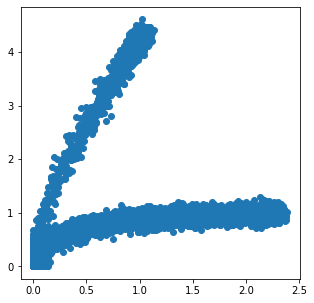

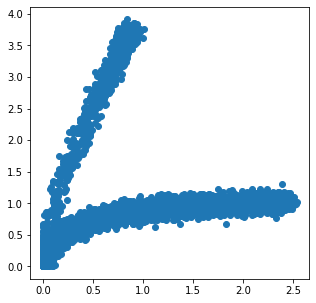

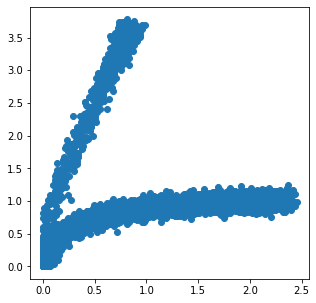

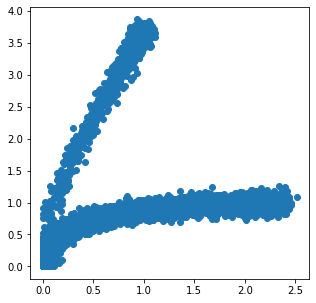

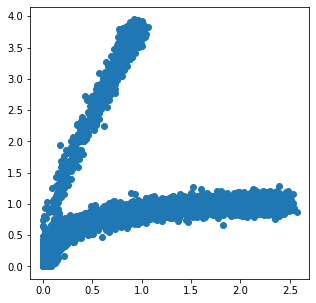

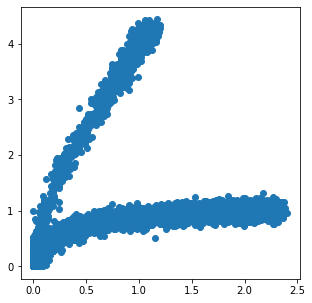

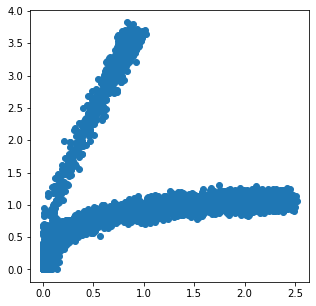

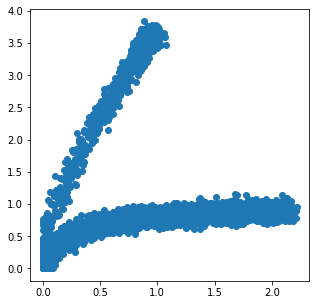

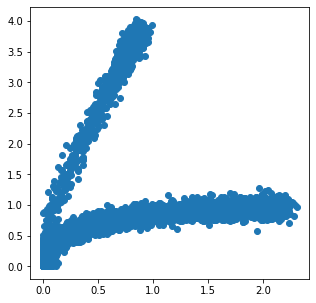

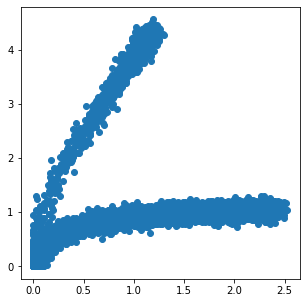

In [13]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_(1000)__R0.2.csv')
gene_list=list(df.gene_name.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice)
    plt.show()

In [16]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

def run_celldancer(raw_data_path,ratio):
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/celldancer/ratio'+str(ratio)
    os.mkdir(save_path)
    df=pd.read_csv(raw_data_path)
    loss_df, cellDancer_df=velocity(df,\
                                 # max_epoches=max_epoches,\
                                 # check_val_every_n_epoch=check_val_every_n_epoch,\
                                 # patience=patience,\
                                 # permutation_ratio=permutation_ratio,\
                                 # speed_up=speed_up,\
                                 # norm_u_s=norm_u_s,\
                                 # norm_cell_distribution=norm_cell_distribution,\
                                 n_jobs=40,\
                                 save_path=save_path)
# ratio_list=[0.2,0.4,0.6,0.8,1]
ratio_list=[1]


for ratio in ratio_list:
    run_celldancer('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_('+str(1000)+')__R'+str(ratio)+'.csv',ratio)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/celldancer/ratio1/cell_dancer_velocity_2022-06-07 16-18-47 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:20<00:00,  5.73s/it]                                                                                                
                                                                                                                                                                    

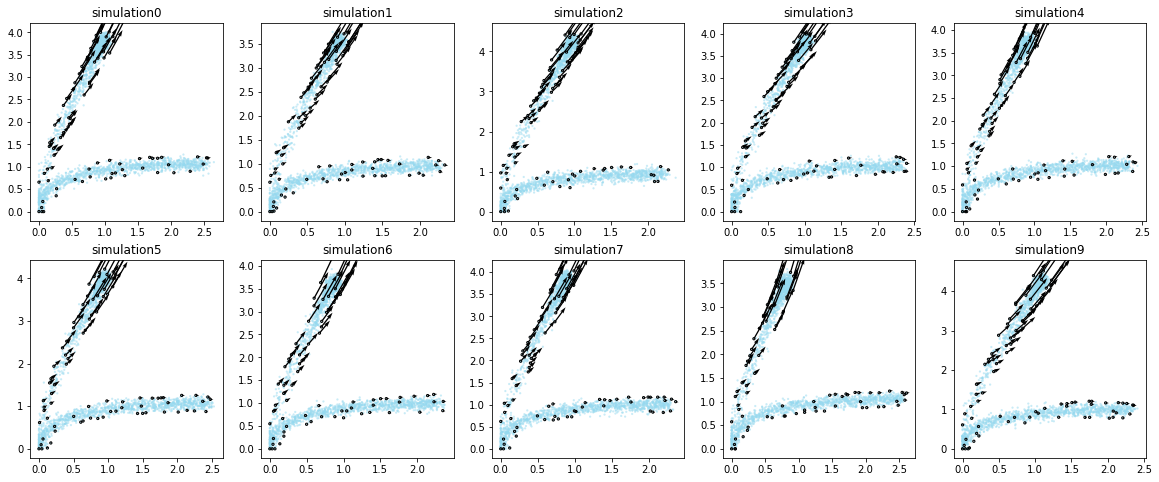

In [28]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

# SIM - Wings

In [ ]:
def SIM_wing_path():
    def gen_wing_path_sim(path2_sample,ratio):
        genn_amt=5#1000
        
        alpha1=5
        beta1=1
        gamma1=0.5
        alpha2=10
        beta2=1
        gamma2=0.5
        
        alpha1_list= np.random.uniform(low=alpha1*0.9, high=alpha1*1.1, size=(genn_amt,)) #upper side
        beta1_list=[beta1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=[gamma2]*genn_amt
        alpha2_list=np.random.uniform(low=alpha2*0.9, high=alpha2*1.1, size=(genn_amt,)) #downside
        beta2_list=[beta2]*genn_amt# np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) #downside
        gamma2_list=[gamma2]*genn_amt
        
        path1_pct_list=[99.999]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))
        path2_pct_list=[90]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))

        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2,path1_pct,path2_pct in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list,path1_pct_list,path2_pct_list):
            data = generate_onepath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=int(path2_sample/ratio), path2_sample=path2_sample, noise_level=0.2)
            data.gene_name = 'simulation'+str(i)
            i=i+1
            if i % 100 == 0:print(i)
                
            dir_name='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(path2_sample)+'__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
                
                
    ratio_list=[0.2,0.4,0.6,0.8,1]
    path2_sample=1000#1000 #from (0,0) # 
    for ratio in ratio_list:
        # print(ratio)
        gen_wing_path_sim(path2_sample,ratio)
SIM_wing_path()

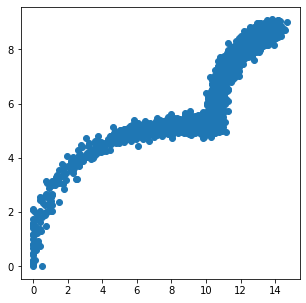

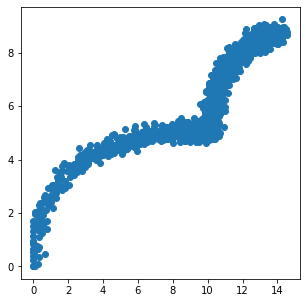

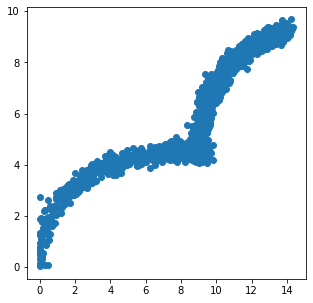

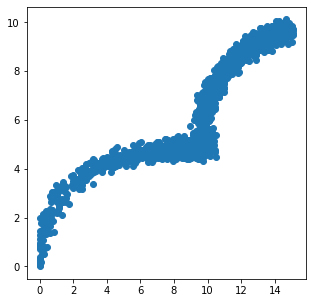

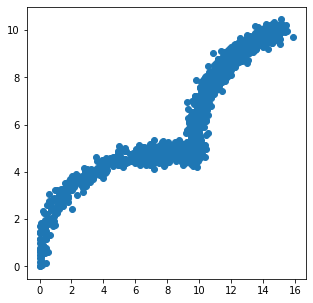

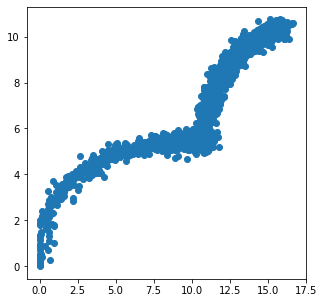

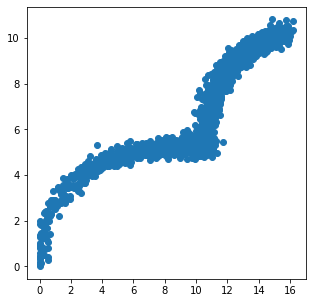

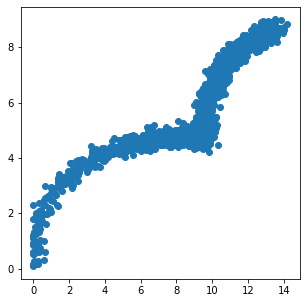

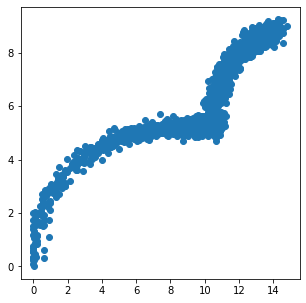

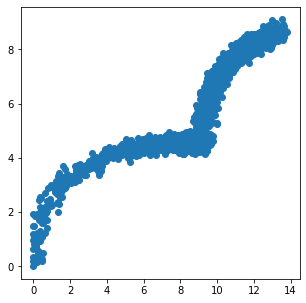

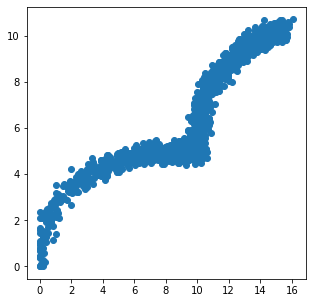

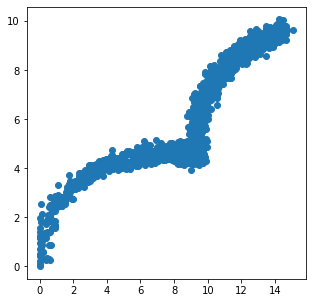

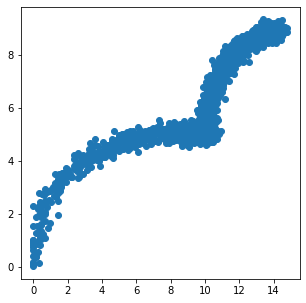

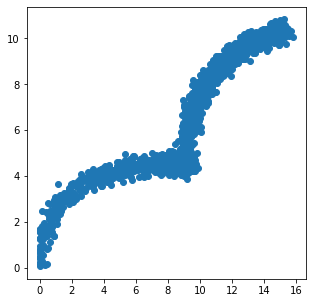

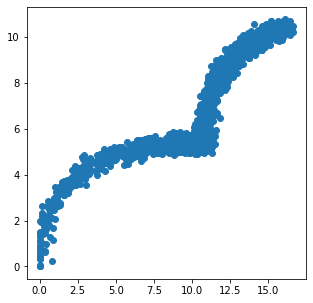

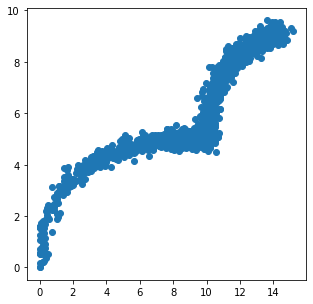

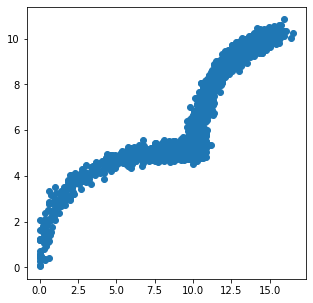

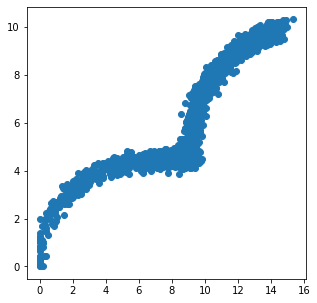

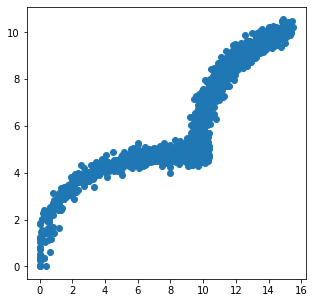

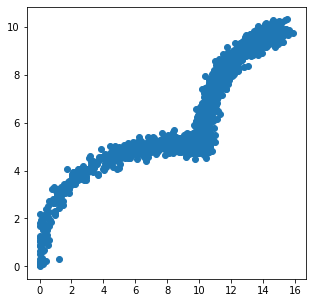

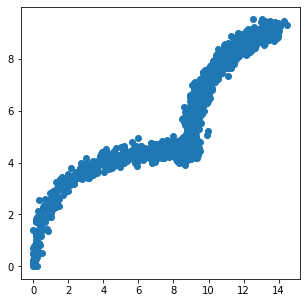

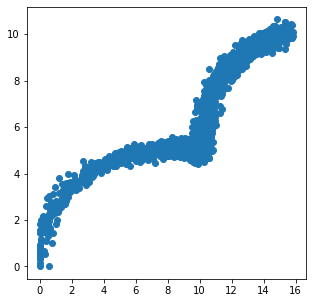

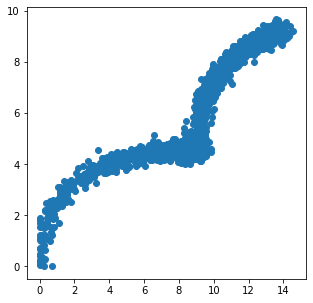

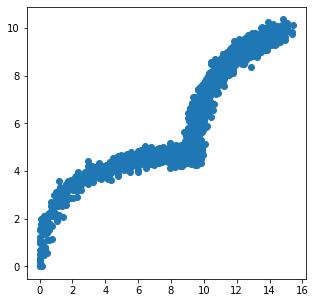

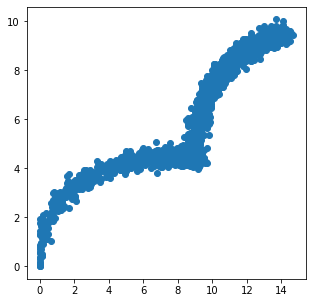

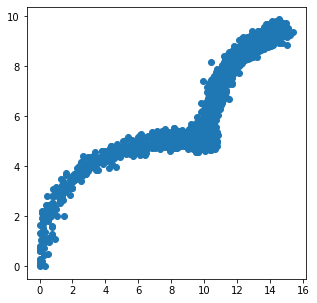

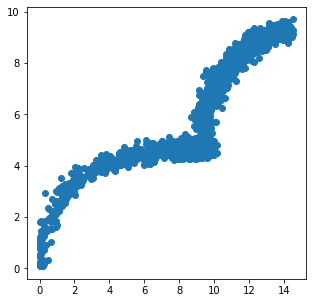

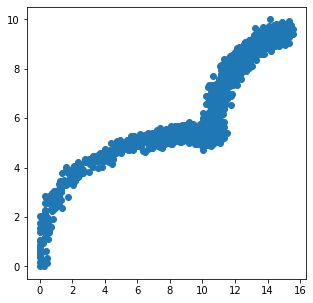

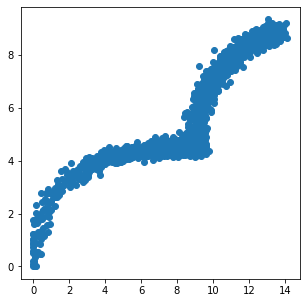

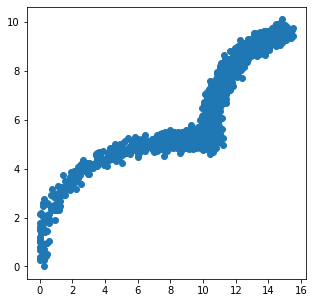

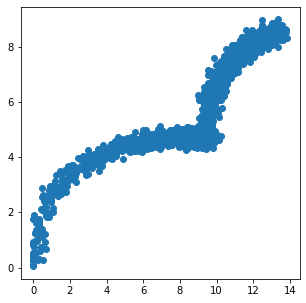

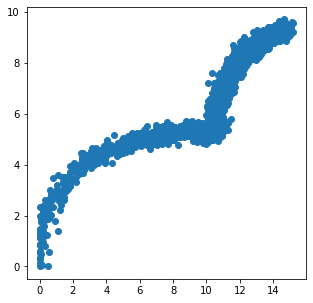

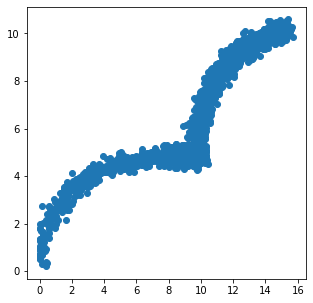

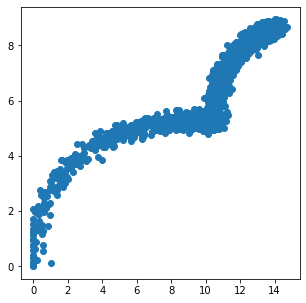

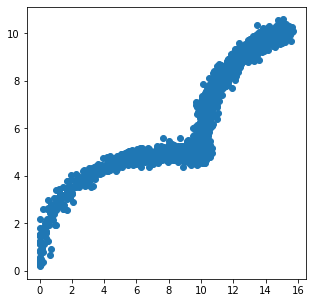

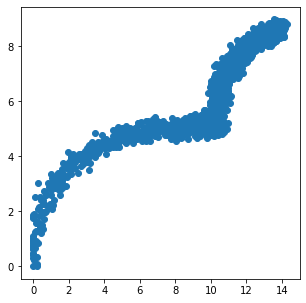

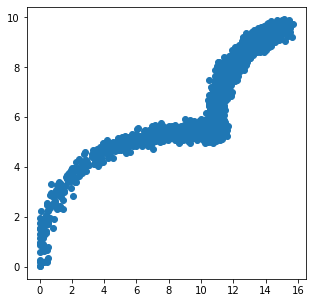

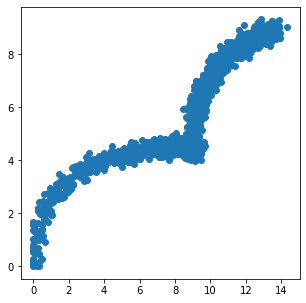

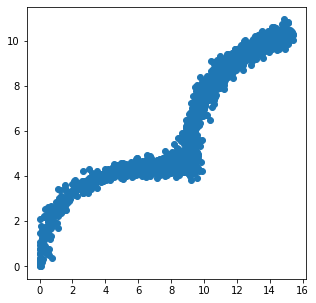

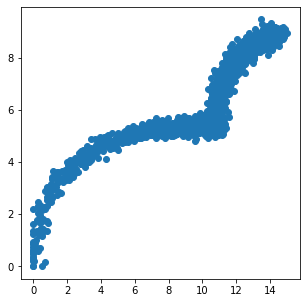

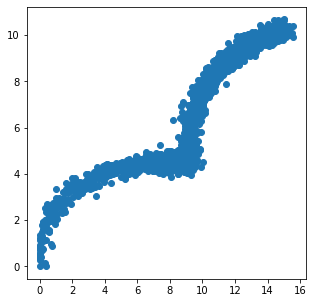

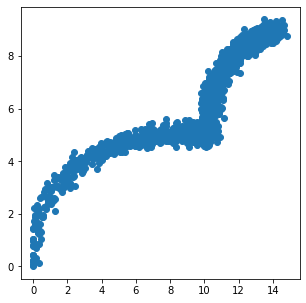

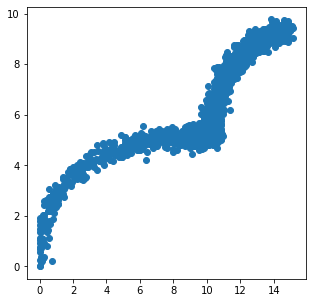

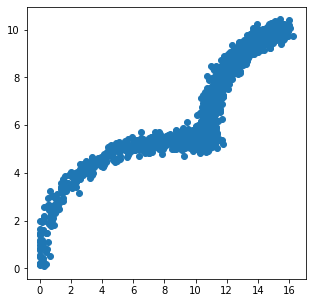

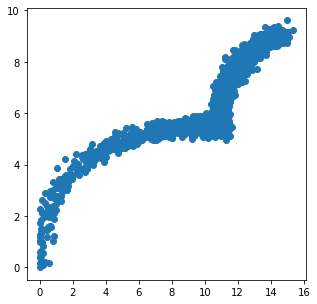

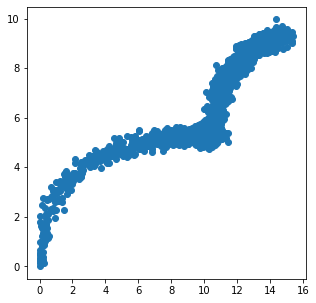

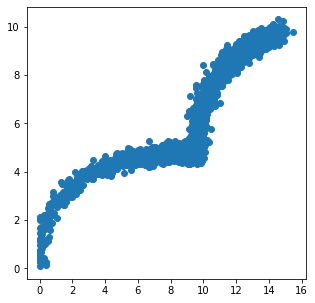

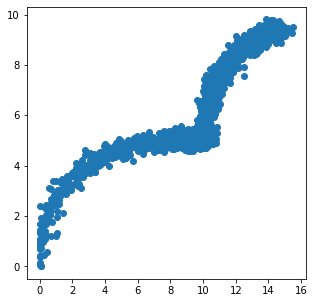

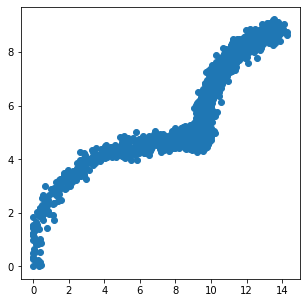

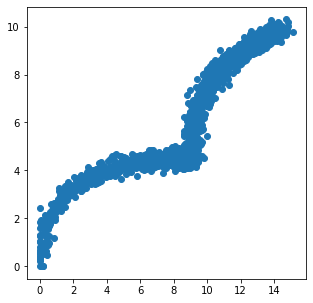

In [16]:
df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(1000)+'__R'+str(1)+'.csv')
gene_list=list(df.gene_name.drop_duplicates())[0:50]
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice)
    plt.show()

In [18]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

def run_celldancer(raw_data_path,ratio):
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio'+str(ratio)
    os.mkdir(save_path)
    df=pd.read_csv(raw_data_path)
    loss_df, cellDancer_df=velocity(df,\
                                 # max_epoches=max_epoches,\
                                 # check_val_every_n_epoch=check_val_every_n_epoch,\
                                 # patience=patience,\
                                 # permutation_ratio=permutation_ratio,\
                                 # speed_up=speed_up,\
                                 # norm_u_s=norm_u_s,\
                                 # norm_cell_distribution=norm_cell_distribution,\
                                 n_jobs=40,\
                                 save_path=save_path)
ratio_list=[0.2,0.4,0.6,0.8,1]
for ratio in ratio_list:
    run_celldancer('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(1000)+'__R'+str(ratio)+'.csv',ratio)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio0.2/cell_dancer_velocity_2022-06-07 16-22-44 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [04:37<00:00, 10.76s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio0.4/cell_dancer_velocity_2022-06-07 16-28-22 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [03:18<00:00,  7.89s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio0.6/cell_dancer_velocity_2022-06-07 16-32-16 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:51<00:00,  6.93s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio0.8/cell_dancer_velocity_2022-06-07 16-35-35 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:35<00:00,  6.14s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio1/cell_dancer_velocity_2022-06-07 16-38-34 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:19<00:00,  5.68s/it]                                                                                                
                                                                                                                                                                    

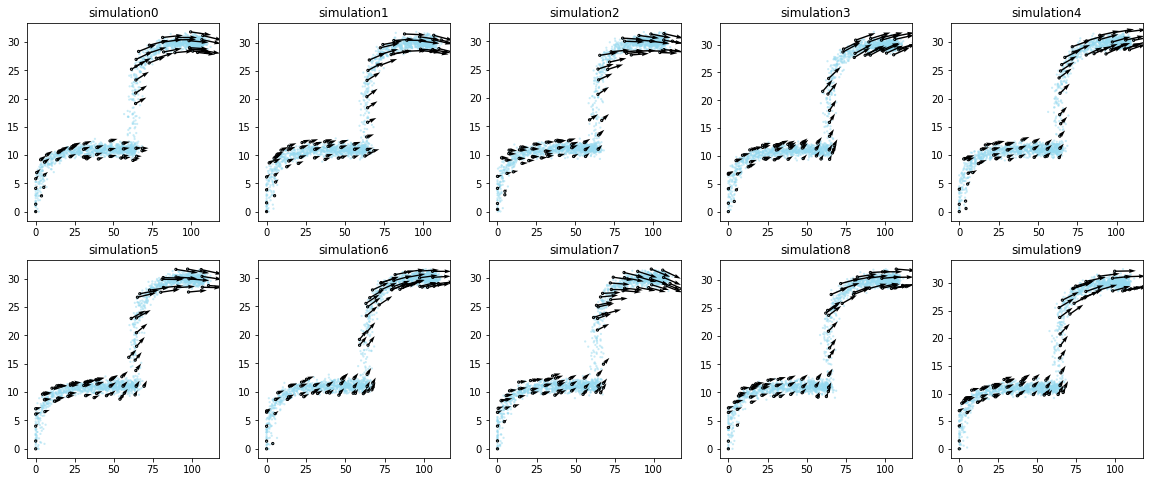

In [83]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

# back

In [ ]:
start_s1=4 #downside
start_u1=1
alpha1=0
beta1=1
gamma1=1
path1_sample=99

start_s2=3
start_u2=4
alpha2=0
beta2=1
gamma2=1
path2_sample=99

df=generate_backward(start_s1, start_s2, start_u1, start_u2, alpha1,alpha2,beta1, beta2, gamma1, gamma2, path1_sample, path2_sample,noise_level=0.2)
plt.figure(figsize=(5,5))
plt.scatter(df.splice,df.unsplice)
d

In [3]:
def SIM_back_path():
    def gen_back_path_sim(path2_sample,ratio):
        genn_amt=1000
        
        start_s1=4 #downside
        start_u1=1
        alpha1=0
        beta1=1
        gamma1=1

        start_s2=3
        start_u2=4
        alpha2=0
        beta2=1
        gamma2=1

        start_s1_list=np.random.uniform(low=start_s1*0.9, high=start_s1*1.1, size=(genn_amt,))
        start_u1_list=np.random.uniform(low=start_u1*0.9, high=start_u1*1.1, size=(genn_amt,)) 
        alpha1_list= [alpha1]*genn_amt #upper side
        beta1_list=[beta1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*0.9, high=gamma1*1.1, size=(genn_amt,))#[gamma2]*genn_amt

        start_s2_list=np.random.uniform(low=start_s2*0.9, high=start_s2*1.1, size=(genn_amt,))
        start_u2_list=np.random.uniform(low=start_u2*0.9, high=start_u2*1.1, size=(genn_amt,)) 
        alpha2_list=[alpha2]*genn_amt
        beta2_list=[beta2]*genn_amt
        gamma2_list=np.random.uniform(low=gamma2*0.9, high=gamma2*1.1, size=(genn_amt,)) #[gamma2]*genn_amt
        
        path1_pct_list=[90]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))
        path2_pct_list=[90]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))

        i=0
        data_df=pd.DataFrame()
        for start_s1,start_s2,start_u1,start_u2, alpha1,alpha2,beta1,beta2,gamma1,gamma2 in zip(start_s1_list,start_s2_list,start_u1_list,start_u2_list, alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list):
            data = generate_backward(start_s1, start_s2, start_u1, start_u2,alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_sample=int(path2_sample/ratio), path2_sample=path2_sample, noise_level=0.2)
            data.loc[:,'gene_name'] = 'simulation'+str(i)
            i=i+1
            if i % 100 == 0:print(i)
                
            dir_name='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path2Upper_'+str(path2_sample)+'__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
                
    ratio_list=[0.2,0.4,0.6,0.8,1]
    path2_sample=1000#1000 #from (0,0) # 
    for ratio in ratio_list:
        # print(ratio)
        gen_back_path_sim(path2_sample,ratio)
SIM_back_path()

100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000


In [ ]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path2Upper_1000__R0.1.csv')
gene_list=list(df.gene_name.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice,alpha=0.1)
    plt.show()
df

In [5]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

def run_celldancer(raw_data_path,ratio):
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio'+str(ratio)
    os.mkdir(save_path)
    df=pd.read_csv(raw_data_path)
    loss_df, cellDancer_df=velocity(df,\
                                 # max_epoches=max_epoches,\
                                 # check_val_every_n_epoch=check_val_every_n_epoch,\
                                 # patience=patience,\
                                 # permutation_ratio=permutation_ratio,\
                                 # speed_up=speed_up,\
                                 # norm_u_s=norm_u_s,\
                                 # norm_cell_distribution=norm_cell_distribution,\
                                 n_jobs=40,\
                                 save_path=save_path)
ratio_list=[0.2,0.4,0.6,0.8,1]
for ratio in ratio_list:
    run_celldancer('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path2Upper_'+str(1000)+'__R'+str(ratio)+'.csv',ratio)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio0.2/cell_dancer_velocity_2022-06-07 18-08-33 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [03:21<00:00,  7.90s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio0.4/cell_dancer_velocity_2022-06-07 18-13-06 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:41<00:00,  6.52s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio0.6/cell_dancer_velocity_2022-06-07 18-16-27 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:16<00:00,  5.39s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio0.8/cell_dancer_velocity_2022-06-07 18-19-14 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [02:02<00:00,  4.94s/it]                                                                                                
                                                                                                                                                                    

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio1/cell_dancer_velocity_2022-06-07 18-21-42 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [01:52<00:00,  4.56s/it]                                                                                                
                                                                                                                                                                    

In [ ]:
###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/scv/'
foldername_para=''
# # path - hpc
# analysis_result_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/analysis_result/'
# detail_input_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/velocity_result/celldancer/'
# raw_input_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/raw/backpath/'
# scv_result_input_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/velocity_result/scv/'

# # path - shengyu
# detail_input_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/multi_path/multi_path_20220222/velocity_result/celldancer/'
# raw_input_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/multi_path/multi_path_20220222/raw/'
# scv_result_input_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/multi_path/multi_path_20220222/velocity_result/scv/'
# analysis_result_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/multi_path/multi_path_20220222/analysis_result'



########## celldancer
print('running celldancer analysis')

# for ratio in [0.2,0.4,0.6,0.8]:
for ratio in [0.6]:
    print(ratio)
    cellDancer = get_similarity_cellDancer(ratio,detail_input_path,raw_input_path,type='multi',foldername_para=foldername_para,path='Path1Upper')
    cellDancer.to_csv(analysis_result_path+'celldancer_similarity_eachCell'+str(ratio)+'.csv')
    sns.boxplot(x="ratio", y="similarity", hue='method', data=cellDancer)

running celldancer analysis
0.6
0


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/analysis_SIM_compare_fun_notebook.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unsplice_predict_true'] = unsplice_predict
/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/analysis_SIM_compare_fun_notebook.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['splice_predict_true'] = splice_predict


In [11]:
gene_list=['simulation0','simulation1','simulation2','simulation3','simulation4','simulation14','simulation285','simulation375','simulation514','simulation586']
df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path2Upper_1000__R1.csv')

loss_df, cellDancer_df=velocity(df,\
                                gene_list=gene_list,
                             max_epoches=2,\
                             check_val_every_n_epoch=1,\
                             # patience=patience,\
                             # permutation_ratio=permutation_ratio,\
                             # speed_up=speed_up,\
                             # norm_u_s=norm_u_s,\
                             norm_cell_distribution=False,\
                             n_jobs=40,\
                             save_path=None)

Using /Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/cell_dancer_velocity_2022-06-08 10-02-10 as the output path.
Arranging genes for parallel job.
10  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]                                                                                                  
                                                                                                                                                                    

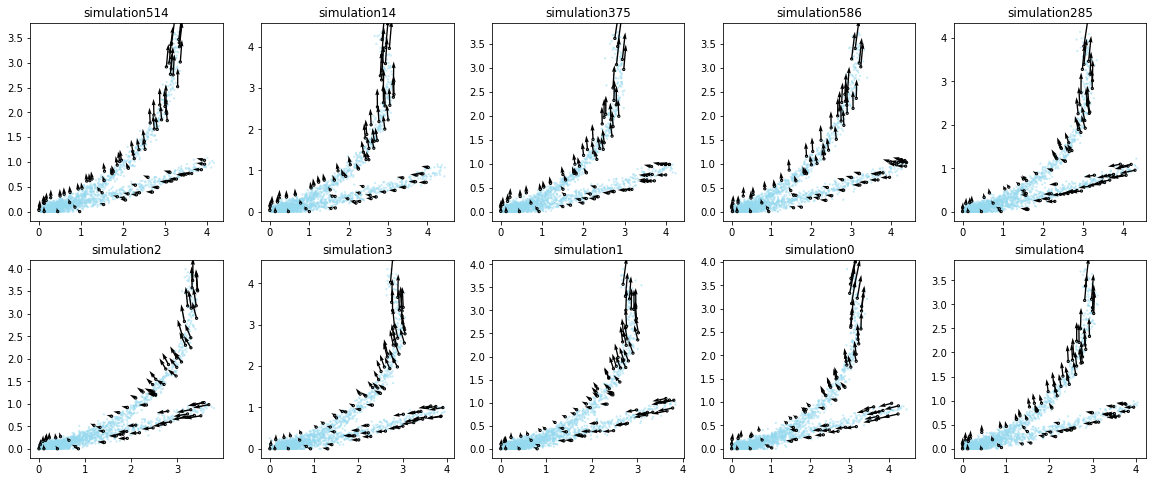

In [12]:
%autoreload 2

gene_list=list(cellDancer_df.gene_name.drop_duplicates())

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()